In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
possible_actions = [[1, 2], [1, 2, 3], [0, 1, 2], [0, 1, 2, 3], [0, 2, 3], [0, 1, 3]]
next_states = [[np.nan, 1, 2, np.nan], [np.nan, 0, 3, 0], [0, 3, 0, np.nan], [1, 4, 5, 2], [0, np.nan, 0, 3], [3, 0, np.nan, 0]]
sa_rewards = [[np.nan, 0, 0, np.nan], [np.nan, -1, 0, 0], [0, 0, -1, np.nan], [0, 0, 0, 0], [-1, np.nan, 1, 0], [0, 1, np.nan, -1]]
gamma = 0.95 #discount factor
alpha0 = 0.05 #initial learning rate
decay = 0.005 #learning rate decay
state = 0 #initial state

In [ ]:
def exploration_policy(state):
    return np.random.choice(possible_actions[state])

In [ ]:
Q_values = np.full((6,4), -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0 #possible actions initialized to 0
print(Q_values)

for iteration in range(100000):
    action = exploration_policy(state)
    next_state = next_states[state][action]
    reward = sa_rewards[state][action]
    alpha = alpha0 / (1 + iteration * decay)
    if reward != 1 and reward != -1:
        next_value = Q_values[next_state].max()
    else:
        next_value = 0 #you died or won, so there is no future
    Q_values[state, action] = (1 - alpha) * Q_values[state, action] + alpha * (reward + gamma * next_value)
    state = next_state

print(Q_values)

[[-inf   0.   0. -inf]
 [-inf   0.   0.   0.]
 [  0.   0.   0. -inf]
 [  0.   0.   0.   0.]
 [  0. -inf   0.   0.]
 [  0.   0. -inf   0.]]
[[       -inf  0.20449119  0.20282725        -inf]
 [       -inf -0.98623902  0.2541022   0.12195161]
 [ 0.12107689  0.25208355 -0.98962476        -inf]
 [ 0.12567178  0.34342892  0.36674931  0.12393245]
 [-0.56889801        -inf  0.53622789  0.10234592]
 [ 0.09835401  0.56227766        -inf -0.5732746 ]]


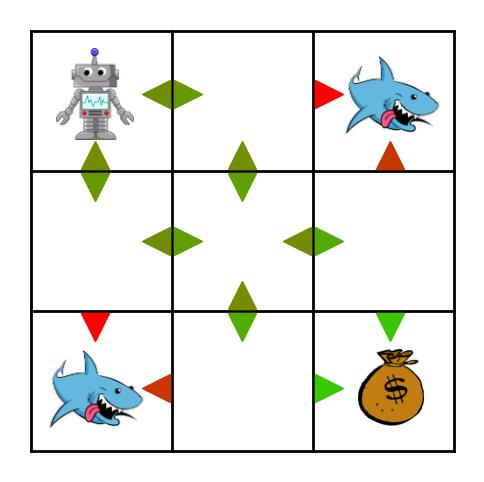

In [ ]:
colors = (Q_values + 1)/2

fig, ax = plt.subplots(figsize=(6, 6))
for i in range(0, 4):
    ax.plot([i/3, i/3], [0, 1], color='black', linewidth=2)
    ax.plot([0, 1], [i/3, i/3], color='black', linewidth=2)

x = 0.15
y = 0.85
z = 0.7
shark = image.imread('drive/MyDrive/shark.png')
imagebox1 = OffsetImage(shark, zoom = z)
ab1 = AnnotationBbox(imagebox1, (x, x), frameon = False)
imagebox2 = OffsetImage(shark, zoom = z)
ab2 = AnnotationBbox(imagebox2, (y, y), frameon = False)

robot = image.imread('drive/MyDrive/robot.png')
imagebox3 = OffsetImage(robot, zoom = z)
ab3 = AnnotationBbox(imagebox3, (x, y), frameon = False)

money = image.imread('drive/MyDrive/money.png')
imagebox4 = OffsetImage(money, zoom = z)
ab4 = AnnotationBbox(imagebox4, (y, x), frameon = False)

ax.add_artist(ab1)
ax.add_artist(ab2)
ax.add_artist(ab3)
ax.add_artist(ab4)

ax.plot(0.705, 0.15, ">", markersize = 20, color = [1-colors[5, 1], colors[5, 1], 0])
ax.plot(0.295, 0.15, "<", markersize = 20, color = [1-colors[5, 3], colors[5, 3], 0])
ax.plot(0.295, 0.5, "<", markersize = 20, color = [1-colors[3, 3], colors[3, 3], 0])
ax.plot(0.705, 0.5, ">", markersize = 20, color = [1-colors[3, 1], colors[3, 1], 0])
ax.plot(0.295, 0.85, "<", markersize = 20, color = [1-colors[1, 3], colors[1, 3], 0])
ax.plot(0.705, 0.85, ">", markersize = 20, color = [1-colors[1, 1], colors[1, 1], 0])
ax.plot(0.5, 0.628, "v", markersize = 20, color = [1-colors[1, 2], colors[1, 2], 0])
ax.plot(0.5, 0.705, "^", markersize = 20, color = [1-colors[3, 0], colors[3, 0], 0])
ax.plot(0.5, 0.372, "^", markersize = 20, color = [1-colors[5, 0], colors[5, 0], 0])
ax.plot(0.5, 0.295, "v", markersize = 20, color = [1-colors[3, 2], colors[3, 2], 0])
ax.plot(0.37, 0.5, ">", markersize = 20, color = [1-colors[2, 1], colors[2, 1], 0])
ax.plot(0.63, 0.5, "<", markersize = 20, color = [1-colors[4, 3], colors[4, 3], 0])
ax.plot(0.37, 0.85, ">", markersize = 20, color = [1-colors[0, 1], colors[0, 1], 0])
ax.plot(0.15, 0.628, "v", markersize = 20, color = [1-colors[0, 2], colors[0, 2], 0])
ax.plot(0.15, 0.705, "^", markersize = 20, color = [1-colors[2, 0], colors[2, 0], 0])
ax.plot(0.15, 0.295, "v", markersize = 20, color = [1-colors[2, 2], colors[2, 2], 0])
ax.plot(0.85, 0.295, "v", markersize = 20, color = [1-colors[4, 2], colors[4, 2], 0])
ax.plot(0.85, 0.705, "^", markersize = 20, color = [1-colors[4, 0], colors[4, 0], 0])
ax.axis('off')

plt.show()